In [8]:
import numpy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D,\
                                     Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from livelossplot.tf_keras import PlotLossesCallback

print(f"Tensorflow version: {tf.__version__}") 

Tensorflow version: 2.2.0


In [4]:
from zipfile import ZipFile

fname1 = 'Data.zip'

with ZipFile(fname1, 'r') as zip:
  zip.extractall()
  print('Done Extracting Data.zip')

Done Extracting Data.zip


In [5]:
fname2 = 'utility_function.zip'

with ZipFile(fname2, 'r') as zip:
  zip.extractall()
  print('Done Extracting utility_function.zip')

Done Extracting utility_function.zip


In [9]:
train_directory = 'Data/train/'
for expression in os.listdir(train_directory):
  print(f"{expression} = {len(os.listdir(train_directory+expression))} images")

angry = 3995 images
neutral = 4965 images
happy = 7215 images
sad = 4830 images
disgust = 436 images
fear = 4097 images
surprise = 3171 images


In [10]:
img_size, batch_size = 48, 64
data_gen = ImageDataGenerator(horizontal_flip = True)
train_generator = data_gen.flow_from_directory('Data/train/',
                                         target_size = (img_size, img_size),
                                         color_mode = 'grayscale',
                                         class_mode = 'categorical',
                                         batch_size = batch_size,
                                         shuffle = True)

validation_generator = data_gen.flow_from_directory('Data/test/',
                                         target_size = (img_size, img_size),
                                         color_mode = 'grayscale',
                                         class_mode = 'categorical',
                                         batch_size = batch_size,
                                         shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

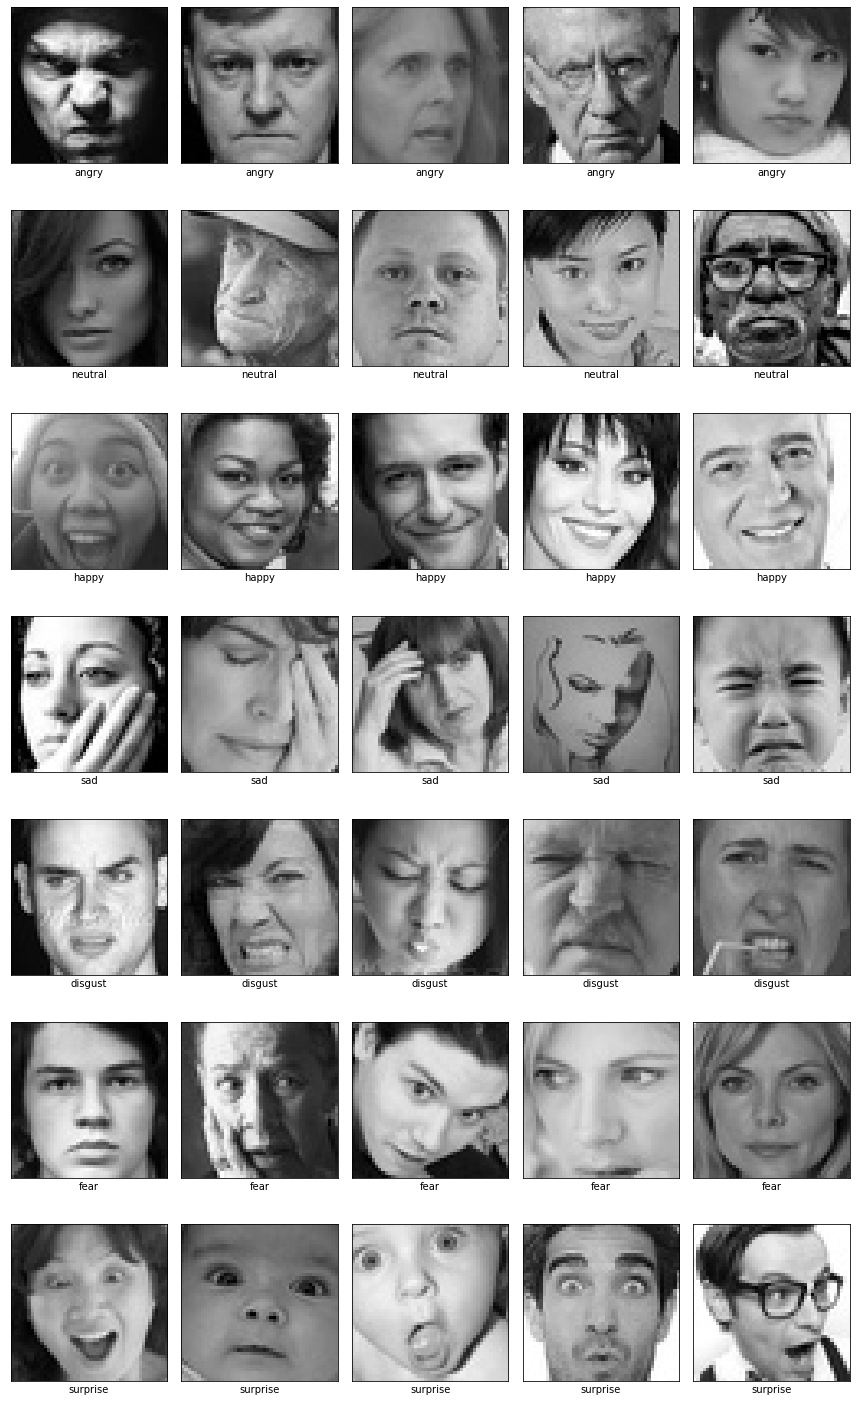

In [36]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def plot_example_images(plt):
    img_size = 48
    plt.figure(0, figsize=(12,20))
    ctr = 0

    for expression in os.listdir("/content/Data/train/"):
        for i in range(1,6):
            ctr += 1
            plt.subplot(7,5,ctr)
            img = load_img("/content/Data/train" + "/" + expression + "/" +os.listdir("/content/Data/train" + "/" + expression)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")
            plt.xlabel(expression)
            plt.xticks([]); plt.yticks([])

    plt.tight_layout()
    return plt
plot_example_images(plt)

In [ ]:
model = Sequential()

#1-Conv Layer
model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2-Conv Layer
model.add(Conv2D(128, (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3-Conv Layer
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#4-Conv Layer
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation = 'softmax'))


In [ ]:
model.compile(optimizer = Adam(lr=0.00005), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 100
train_steps = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size



checkpoint = ModelCheckpoint('model_weights.h5',monitor = 'val_accuracy',save_weights_only = True,mode = 'max',verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.1,patience = 2,min_lr = 0.00001,mode = 'auto')

callbacks = [checkpoint, reduce_lr]

history = model.fit(train_generator,
                    steps_per_epoch = train_steps,
                    epochs = epochs,
                    validation_data = validation_generator,
                    validation_steps = validation_steps,
                    callbacks = callbacks)

Epoch 1/100
446/448 [============================>.] - ETA: 0s - loss: 2.0661 - accuracy: 0.2232
Epoch 00001: saving model to model_weights.h5
448/448 [==============================] - 11s 24ms/step - loss: 2.0652 - accuracy: 0.2234 - val_loss: 1.8131 - val_accuracy: 0.2751 - lr: 5.0000e-05
Epoch 2/100
448/448 [==============================] - ETA: 0s - loss: 1.8856 - accuracy: 0.2713
Epoch 00002: saving model to model_weights.h5
448/448 [==============================] - 11s 25ms/step - loss: 1.8856 - accuracy: 0.2713 - val_loss: 1.7198 - val_accuracy: 0.3188 - lr: 5.0000e-05
Epoch 3/100
448/448 [==============================] - ETA: 0s - loss: 1.8037 - accuracy: 0.3032
Epoch 00003: saving model to model_weights.h5
448/448 [==============================] - 11s 24ms/step - loss: 1.8037 - accuracy: 0.3032 - val_loss: 1.6703 - val_accuracy: 0.3517 - lr: 5.0000e-05
Epoch 4/100
447/448 [============================>.] - ETA: 0s - loss: 1.7390 - accuracy: 0.3323
Epoch 00004: saving mode

In [ ]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#For Training
losses_train = history.history['loss']
accuracy_train = history.history['accuracy']

#For Validation
losses_test = history.history['val_loss']
accuracy_test = history.history['val_accuracy']

epochs_num = [d for d in range(1,101)]

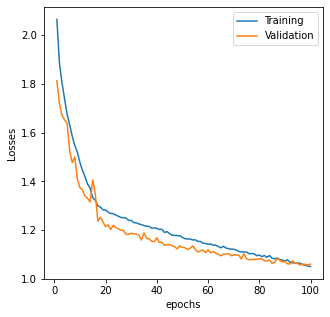

In [ ]:
plt.figure(figsize=(5, 5))
plt.xlabel('epochs'); plt.ylabel('Losses')
plt.plot(epochs_num, losses_train, label = 'Training')
plt.plot(epochs_num, losses_test, label = 'Validation' )
plt.legend()
plt.show()

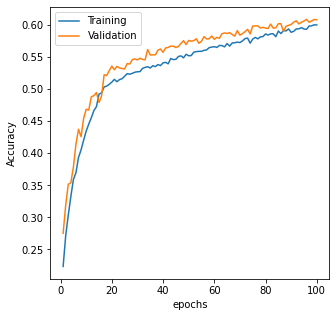

In [ ]:
plt.figure(figsize=(5, 5))
plt.xlabel('epochs'); plt.ylabel('Accuracy')
plt.plot(epochs_num, accuracy_train, label = 'Training')
plt.plot(epochs_num, accuracy_test, label = 'Validation' )
plt.legend()
plt.show()